In [169]:


from ucimlrepo import fetch_ucirepo
import pandas as pd
import random
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

import re
# fetch dataset 
energy_efficiency = fetch_ucirepo (id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
#print(energy_efficiency.metadata) 
  
# variable information 
print(energy_efficiency.variables) 
x = 0
# Check if 'df' is a DataFrame
if isinstance(energy_efficiency.variables, pd.DataFrame):
#if isinstance(x, pd.DataFrame):
    print("The object 'df' is a DataFrame.")
else:
    print("The object 'df' is NOT a DataFrame.")


  name     role        type demographic                description units  \
0   X1  Feature  Continuous        None       Relative Compactness  None   
1   X2  Feature  Continuous        None               Surface Area  None   
2   X3  Feature  Continuous        None                  Wall Area  None   
3   X4  Feature  Continuous        None                  Roof Area  None   
4   X5  Feature  Continuous        None             Overall Height  None   
5   X6  Feature     Integer        None                Orientation  None   
6   X7  Feature  Continuous        None               Glazing Area  None   
7   X8  Feature     Integer        None  Glazing Area Distribution  None   
8   Y1   Target  Continuous        None               Heating Load  None   
9   Y2   Target  Continuous        None               Cooling Load  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7          

In [170]:

explanatory_var = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"]
energy_efficiency.data.features.columns  = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution"]
categorical_variables = ["Orientation"]
numerical_variables = [var for var in explanatory_var if var not in categorical_variables]

explanatory_var = energy_efficiency.data.features.columns 


In [171]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
random_seed = 32
random.seed(random_seed)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=random_seed)



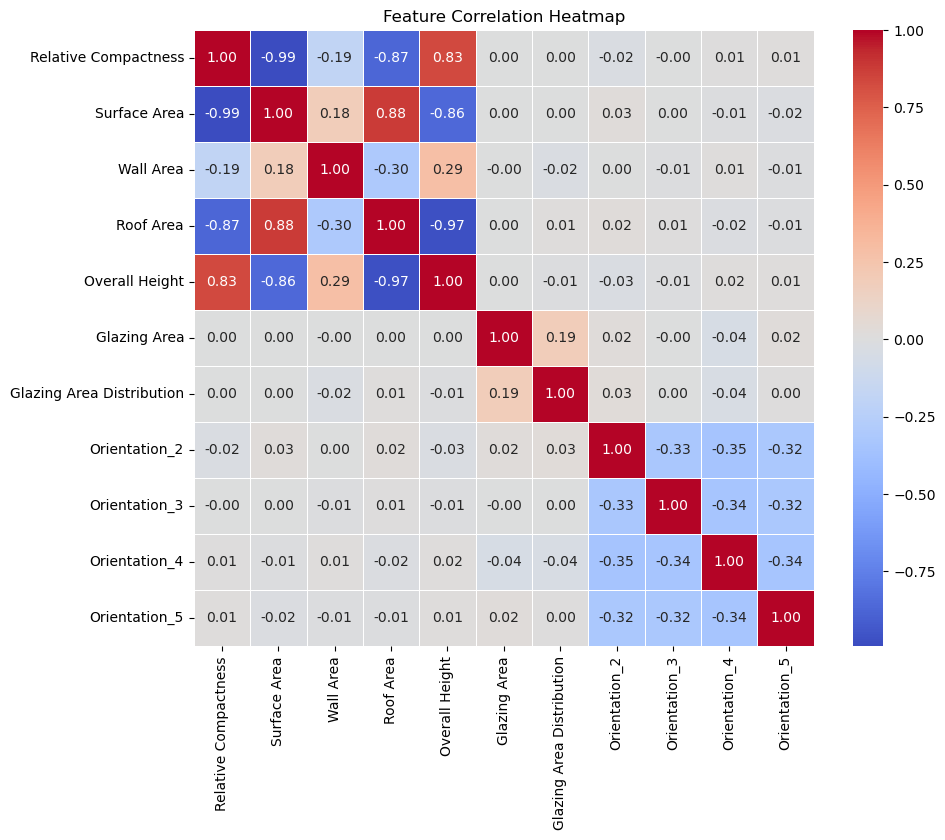

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Numerical and Categorical Pipelines
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessing_pipeline = ColumnTransformer([
    ("num_pipeline", numerical_pipeline, numerical_variables),
    ("encoder", OneHotEncoder(handle_unknown='ignore'), categorical_variables)
])

# Fit and transform the data
X_train_transformed_tmp = preprocessing_pipeline.fit_transform(X_train)

# Recreate column names
numerical_column_names = numerical_variables  # Original numerical column names
encoded_categories = preprocessing_pipeline.named_transformers_["encoder"].get_feature_names_out(categorical_variables)
all_column_names = list(numerical_column_names) + list(encoded_categories)

# Convert to DataFrame with correct column names
X_train_transformed_tmp = pd.DataFrame(X_train_transformed_tmp, columns=all_column_names)

# Compute and plot correlation matrix
correlation_matrix = X_train_transformed_tmp.corr()

plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig(Path("Assets") / Path ("Feature_Correlation_Heatmap"), dpi=200)
plt.show()

In [173]:

print(X.shape)
print(y.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(768, 8)
(768, 2)
(154, 2)
(614, 8)
(614, 2)
(154, 8)
(154, 2)


In [174]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
import numpy as np


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=random_seed)

# Numerical Pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("pca", PCA())  # PCA placeholder, n_components will be tuned
])

# Preprocessing Pipeline
preprocessing_pipeline = ColumnTransformer([
    ("num_pipeline", numerical_pipeline, numerical_variables),
    ("encoder", OneHotEncoder(handle_unknown="ignore"), categorical_variables)
])

regressor_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("regressor", LinearRegression())
])
# Grid Search for PCA n_components
param_grid = {
    "preprocessing__num_pipeline__pca__n_components": [1, 3, 5]  # List of n_components to try
}

# GridSearchCV Setup
grid_search = GridSearchCV(
    estimator=regressor_pipeline,
    param_grid=param_grid,
    cv=2,  # Cross-validation folds
    scoring="r2",  # Use R^2 as the scoring metric
    verbose=1
)


In [176]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse, r2_score


# Assume `grid_search` and data splits are defined already
tests = [[X_train, y_train], [X_test, y_test]]
labels = ["Training_Set", "Test_Set"]

# Fit Grid Search on Training Set
grid_search.fit(tests[0][0], tests[0][1])
best_mdl = grid_search.best_estimator_

# Save Results
columns_to_keep = ['mean_test_score', 'rank_test_score', 'hyperparam_combination']
results_df = pd.DataFrame(grid_search.cv_results_)
results_df['hyperparam_combination'] = results_df['params'].apply(
    lambda x: re.sub("classifier", "", re.sub(r"[{}()_:]", "", str(x)))
)
results_df = results_df.sort_values(by='rank_test_score')
results_df_table = results_df[columns_to_keep]
results_df_table.to_csv("Hyperparametersresults_test_set.csv", index=False)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (R^2):", grid_search.best_score_)

pca = best_mdl.named_steps['preprocessing'].named_transformers_['num_pipeline'].named_steps['pca']
# Extract the components (weights for each feature on each principal axis)
pca_components = pca.components_
print (pca_components)
# Evaluate on Test Data
for test_sel, label in zip(tests, labels):
    predictions_test = best_mdl.predict(test_sel[0])
    rmse = np.sqrt(mse(test_sel[1], predictions_test))
    r2 = r2_score(test_sel[1], predictions_test)
    print(f"{label} RMSE: {rmse:.4f}")
    print(f"{label} R-Squared (R²): {r2:.4f}")


feature_importance = best_mdl.named_steps['regressor'].coef_



feature_names = X_train_transformed_tmp.columns
print (feature_names.shape)
print (feature_importance.shape)
#importance_df = pd.DataFrame({
#    "Feature": feature_names,
#    "Importance": feature_importance
#}).sort_values(by="Importance", ascending=False)
#plt.figure(figsize=(10, 6))
#sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_d")
#plt.title("Feature Relevance Plot")
#plt.xlabel("Feature Importance")
#plt.ylabel("Features")
#plt.tight_layout()
#plt.show()
  
#regressor_pipeline.named_steps["regressor"].coef_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Parameters: {'preprocessing__num_pipeline__pca__n_components': 5}
Best Cross-Validation Score (R^2): 0.8945108948591403
[[ 4.95267033e-01 -5.00770084e-01  4.13670840e-02 -5.05178451e-01
   4.96999830e-01 -4.89296172e-04 -3.78356930e-03]
 [-2.35088383e-01  2.22898508e-01  8.46032759e-01 -1.91575858e-01
   1.91563441e-01 -2.00594053e-01 -2.56207814e-01]
 [ 7.73445234e-02 -7.65104488e-02 -2.88419966e-01  6.48036769e-02
  -6.99687607e-02 -6.80339511e-01 -6.58043240e-01]
 [ 1.09157166e-02 -9.32406297e-03 -3.68640345e-02  8.72372196e-03
  -1.30329093e-02  7.04907148e-01 -7.08021825e-01]
 [ 4.95071471e-01 -6.62319554e-02  2.89094508e-01 -2.03447197e-01
  -7.90904936e-01 -1.11561900e-03  4.39391621e-03]]
Training_Set RMSE: 3.0672
Training_Set R-Squared (R²): 0.8989
Test_Set RMSE: 3.1580
Test_Set R-Squared (R²): 0.9036
(11,)
(2, 9)


   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0              0.495267     -0.500770   0.041367  -0.505178        0.497000   
1             -0.235088      0.222899   0.846033  -0.191576        0.191563   
2              0.077345     -0.076510  -0.288420   0.064804       -0.069969   
3              0.010916     -0.009324  -0.036864   0.008724       -0.013033   
4              0.495071     -0.066232   0.289095  -0.203447       -0.790905   

   Glazing Area  Glazing Area Distribution  
0     -0.000489                  -0.003784  
1     -0.200594                  -0.256208  
2     -0.680340                  -0.658043  
3      0.704907                  -0.708022  
4     -0.001116                   0.004394  


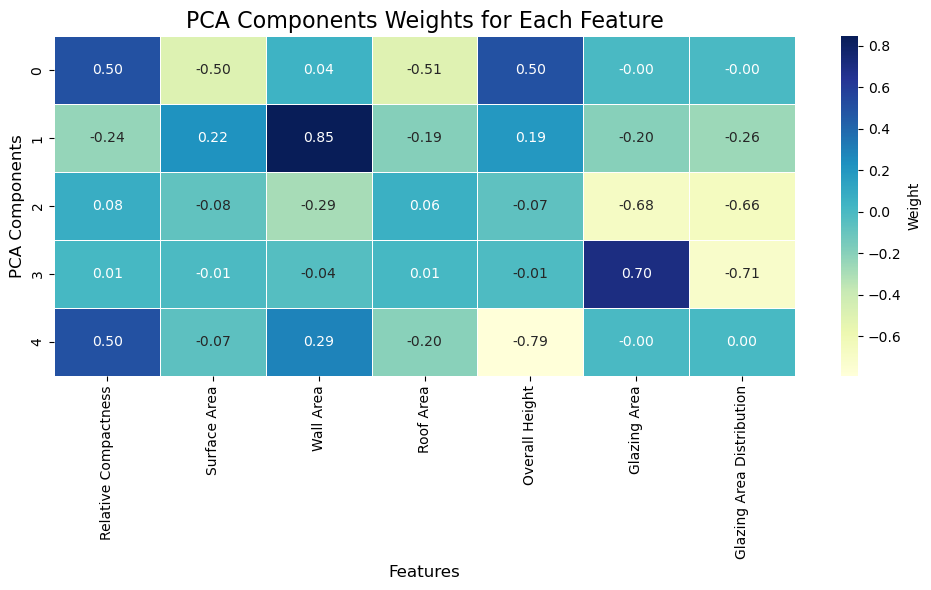

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming pca_components has been extracted as follows:
# pca_components = pca.components_

# Assuming 'numerical_variables' is a list of feature names from your dataset
# For example: numerical_variables = ['feature_1', 'feature_2', ..., 'feature_n']

# Create a DataFrame from PCA components
# Rows correspond to each PCA component, columns to features
pca_components_df = pd.DataFrame(pca_components, columns = numerical_variables )

# Print out the DataFrame to verify the structure
print(pca_components_df)

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pca_components_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Weight'}, linewidths=0.5)

# Add titles and labels
plt.title('PCA Components Weights for Each Feature', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('PCA Components', fontsize=12)

plt.savefig(Path("Assets") / Path ("PCA Components"), dpi=200)
# Display the plot
plt.tight_layout()
plt.show()


In [184]:
import numpy as np

# Step 1: Identify the most important PCA component
# Calculate the sum of squared loadings for each PCA component
squared_loadings = np.sum(pca_components_df**2, axis=1)
most_important_pca_component_index = np.argmax(squared_loadings)
most_important_pca_component = most_important_pca_component_index + 1  # Adding 1 to match 1-indexed PC

# Step 2: Identify the most important feature
# Find the maximum absolute value for each feature across all PCA components
most_important_feature_index = np.argmax(np.max(np.abs(pca_components_df), axis=0))
most_important_feature = numerical_variables[most_important_feature_index]  # Feature name directly

# Step 3: Identify the worst feature
# Find the minimum absolute value for each feature across all PCA components
worst_feature_index = np.argmin(np.max(np.abs(pca_components_df), axis=0))  # Minimum contribution
worst_feature = numerical_variables[worst_feature_index]  # Feature name directly

# Output the results
print(f"The most important PCA component is: PC{most_important_pca_component}")
print(f"The most important feature is: {most_important_feature}")
print(f"The worst feature is: {worst_feature}")

The most important PCA component is: PC2
The most important feature is: Wall Area
The worst feature is: Relative Compactness
